In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import wordcloud
from wordcloud import STOPWORDS

In [2]:
data=pd.read_csv('vaccination_tweets.csv')

In [3]:
data.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [4]:
data.shape

(10453, 16)

In [5]:
data.info

<bound method DataFrame.info of                         id                 user_name  \
0      1340539111971516416                Rachel Roh   
1      1338158543359250433               Albert Fong   
2      1337858199140118533                  eli🇱🇹🇪🇺👌   
3      1337855739918835717             Charles Adler   
4      1337854064604966912      Citizen News Channel   
...                    ...                       ...   
10448  1435375992630022149     🤴 KING OF BACCHANAL 🤴   
10449  1435326081381421061                  𝓝𝓪𝓲𝓵𝓪𝓱 💐   
10450  1435309097943961601               Mind & Body   
10451  1435289766514155524  TAL Pharmacy Recruitment   
10452  1435266501708185601                   Atheria   

                   user_location  \
0      La Crescenta-Montrose, CA   
1              San Francisco, CA   
2                       Your Bed   
3         Vancouver, BC - Canada   
4                            NaN   
...                          ...   
10448              Linden Guyana   
10449  

In [6]:
data.isnull().mean()

id                  0.000000
user_name           0.000000
user_location       0.202143
user_description    0.061992
user_created        0.000000
user_followers      0.000000
user_friends        0.000000
user_favourites     0.000000
user_verified       0.000000
date                0.000000
text                0.000000
hashtags            0.233330
source              0.000096
retweets            0.000000
favorites           0.000000
is_retweet          0.000000
dtype: float64

In [7]:
data['text']

0        Same folks said daikon paste could treat a cyt...
1        While the world has been on the wrong side of ...
2        #coronavirus #SputnikV #AstraZeneca #PfizerBio...
3        Facts are immutable, Senator, even when you're...
4        Explain to me again why we need a vaccine @Bor...
                               ...                        
10448    YES I DID IT. GOT VACCINATED TODAY AGAINST COV...
10449    “Let’s just trust the science”…🤔\n\nA pretty l...
10450    #PfizerBiontech #vaccine have got full FDA app...
10451    Study: adverse effects of the #PfizerBioNTech ...
10452    Major MED Journal: Criticizes “RUSHED” FDA app...
Name: text, Length: 10453, dtype: object

In [8]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
wl=WordNetLemmatizer()

In [9]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Laxman
[nltk_data]     Singh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
corpus=[]
for i in range(0,len(data)):
    message=re.sub('[^a-zA-Z]','',data['text'][i])
    message=message.lower()
    message=message.split()
    
    message=[wl.lemmatize(word) for word in message if not word in stopwords.words('english')]
    message=''.join(message)
    corpus.append(message)

## Covid-19 Vaccine Vander Sentiment Analysis

VANDER sentimental analysis relies on a dictionary that maps lexical characteristics to emotional intensities called sentiment scores. A text’s sentiment score can be obtained by summarizing the intensity of each word in the text.

For example, – Words like “love”, “appreciate”, “happy” all convey a positive feeling. Also, VADER is smart enough to understand the basic context of such words, such as “disliked” as a negative statement. It also includes an emphasis on capital letters and punctuation, such as “ENJOY”. Now let’s prepare the data for Vander Sentiment Analysis:

In [11]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\Laxman
[nltk_data]     Singh\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [12]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
sid = SIA()
data['sentiments']           = data['text'].apply(lambda x: sid.polarity_scores(' '.join(re.findall(r'\w+',x.lower()))))
data['Positive Sentiment']   = data['sentiments'].apply(lambda x: x['pos']+1*(10**-6)) 
data['Neutral Sentiment']    = data['sentiments'].apply(lambda x: x['neu']+1*(10**-6))
data['Negative Sentiment']   = data['sentiments'].apply(lambda x: x['neg']+1*(10**-6))



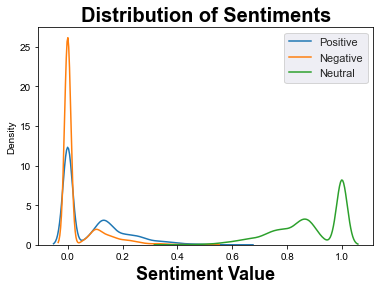

In [13]:
sns.kdeplot(data['Positive Sentiment'],gridsize=200)
sns.kdeplot(data['Negative Sentiment'],gridsize=200)
sns.kdeplot(data['Neutral Sentiment'],gridsize=200)
sns.set(style='darkgrid')
sns.set(rc={'figure.figsize':(5.7,5.27)})
plt.title('Distribution of Sentiments',fontsize=20,fontweight='bold')
plt.xlabel('Sentiment Value',fontsize=18,fontweight='bold')
plt.legend(['Positive','Negative','Neutral'])
plt.show()

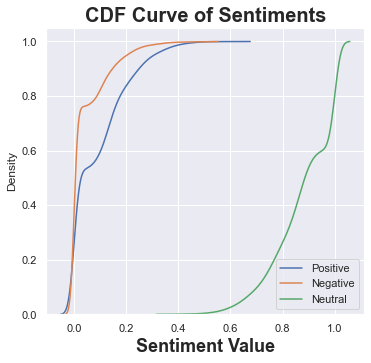

In [14]:
sns.kdeplot(data['Positive Sentiment'],cumulative=True)
sns.kdeplot(data['Negative Sentiment'],cumulative=True)
sns.kdeplot(data['Neutral Sentiment'],cumulative=True)
sns.set(style='darkgrid')
sns.set(rc={'figure.figsize':(5.7,5.27)})
plt.title('CDF Curve of Sentiments',fontsize=20,fontweight='bold')
plt.xlabel('Sentiment Value',fontsize=18,fontweight='bold')
plt.legend(['Positive','Negative','Neutral'])
plt.show()

#### You can observe that the distributions of sentiment follow a normal distribution; negative and positive feelings are very similar, suggesting that there can be no significant differences in the strength of the positive and negative feelings in our data.



In [15]:
Most_Positive =data[data['Positive Sentiment'].between(0.4,1)]
Most_Negative = data[data['Negative Sentiment'].between(0.25,1)]

In [16]:
Most_Positive_text = ' '.join(Most_Positive.text)
Most_Negative_text = ' '.join(Most_Negative.text)

In [17]:
from wordcloud import WordCloud
pwc = WordCloud(width=600,height=400,collocations = False).generate(Most_Positive_text)
nwc = WordCloud(width=600,height=400,collocations = False).generate(Most_Negative_text)

Text(0.5, 1.0, 'Common words among most positive tweets')

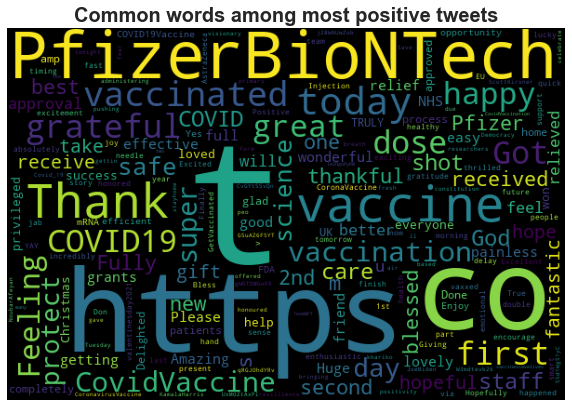

In [24]:
plt.imshow(pwc)
plt.axis('off')
plt.rc('figure',figsize=(10,8))
plt.title('Common words among most positive tweets',fontsize=20,fontweight='bold')

Text(0.5, 1.0, 'Common words among most negative tweets')

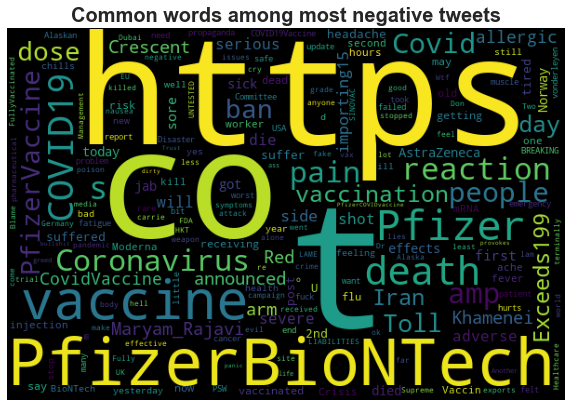

In [19]:
plt.imshow(nwc)
plt.axis('off')
plt.rc('figure',figsize=(10,8))
plt.title('Common words among most negative tweets',fontsize=20,fontweight='bold')

In [20]:
l_t=Most_Positive_text
w1_dict = dict()
for word in l_t.split():
    w= word.strip()
    if w in STOPWORDS:
        continue
    else:
        w1_dict[w] = w1_dict.get(w,0)+1
w1_dict = {k: v for k, v in sorted(w1_dict.items(), key=lambda item: item[1],reverse=True)}

In [21]:
l_t = Most_Negative_text
w2_dict = dict()
for word in l_t.split():
    w= word.strip()
    if w in STOPWORDS:
        continue
    else:
        w2_dict[w] = w2_dict.get(w,0)+1
w2_dict = {k: v for k, v in sorted(w2_dict.items(), key=lambda item: item[1],reverse=True)}

In [22]:
top_10_pos = list(w1_dict.keys())[:10]
top_10_neg = list(w2_dict.keys())[:10]


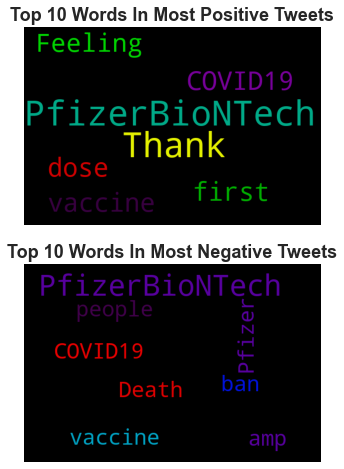

In [23]:
plt.subplot(2,1,1)
w_c = WordCloud(width=600,height=400,collocations = False,colormap='nipy_spectral').generate(' '.join(top_10_pos))
plt.title('Top 10 Words In Most Positive Tweets',fontsize=18,fontweight='bold')
plt.imshow(w_c)
plt.axis('off')
plt.subplot(2,1,2)
w_c = WordCloud(width=600,height=400,collocations = False,colormap='nipy_spectral').generate(' '.join(top_10_neg))
plt.title('Top 10 Words In Most Negative Tweets',fontsize=18,fontweight='bold')
plt.imshow(w_c)
plt.axis('off')
plt.show()